In [22]:
from sklearn.metrics import accuracy_score
import pandas as pd
import time
from math import sqrt
import itertools
import numpy as np


def extract_features(index, dataset): # function that takes list of feature names and returns those features only from dataset
    index = np.array(index)
    index = index - 1 # Subtracting 1 because in numpy number starts from 0
    return dataset[:, index]

def knn(data, y, k = 5):
    neighbours = []
    predictions = []
    data = np.array(data)
    
    
    for index in range(len(data)): # iterating over all the datapoints
        neighbours = []
        datapoint = data[index]  # taking single datapoint
        edf = pow((datapoint - data), 2) # taking difference of the datapoint with rest of the datapoints in the dataset
        sumdf = edf.sum(axis = 1) # taking sum of the rows we got 
        sumdf = sumdf **(1/2) # euclidean # taking square root of the sum of the rows
        # so far we have calculated the scores 
        sortedseries = sorted(sumdf)  # sorted scores
        sumdf = list(sumdf)
        for i in range(1, k+1):
            val = sortedseries[i]
            ind = sumdf.index(val)
            neighbours.append(y[ind]) 
        res = max(set(neighbours), key = neighbours.count) # taking majority of the classes
        predictions.append(res) # appending the prediction (majority) to the list
    return predictions

In [23]:
filename = input("Type in the name of the file to test: ")
print("1) Forward Selection \n2) Backward Elimination") # User input for the algorithm
algo = int(input("Type the number of the algorithm you want to run:"))
data = open(filename).read() # reading dataset
data = data.split("\n") # spliting whole data with new lines

X = []
y = []

for i in data:
    if len(i) > 1: 
        i = i.strip() # removing extra spaces
        line = i.split("  ") # spliting each feature within single data point
        y.append(float(line[0])) # storing the target column
        single_instance = [] 
        for j in line[1:]:
            single_instance.append(float(j)) # stroing all features of single instance (data point)
        X.append(single_instance) 
X = np.array(X)
# CS170_Small_Data__96.txt
# CS170_Large_Data__1.txt
# CS170_Large_Data__21.txt

1) Forward Selection 
2) Backward Elimination


Features:  [1] Accuracy:  86.2
Features:  [2] Accuracy:  79.2
Features:  [3] Accuracy:  80.6
Features:  [4] Accuracy:  79.6
Features:  [5] Accuracy:  76.8
Features:  [6] Accuracy:  75.6
Best Feature is:  [1] with accuracy: 86.2 

Features:  [2, 1] Accuracy:  81.6
Features:  [3, 1] Accuracy:  88.2
Features:  [4, 1] Accuracy:  85.0
Features:  [5, 1] Accuracy:  84.4
Features:  [6, 1] Accuracy:  96.2
Best Feature is:  [6, 1] with accuracy: 96.2 

Features:  [2, 6, 1] Accuracy:  90.6
Features:  [3, 6, 1] Accuracy:  93.0
Features:  [4, 6, 1] Accuracy:  92.8
Features:  [5, 6, 1] Accuracy:  92.6
Best Feature is:  [3, 6, 1] with accuracy: 93.0 

Features:  [2, 3, 6, 1] Accuracy:  90.4
Features:  [4, 3, 6, 1] Accuracy:  90.0
Features:  [5, 3, 6, 1] Accuracy:  91.2
Best Feature is:  [5, 3, 6, 1] with accuracy: 91.2 

Features:  [2, 5, 3, 6, 1] Accuracy:  86.2
Features:  [4, 5, 3, 6, 1] Accuracy:  88.2
Best Feature is:  [4, 5, 3, 6, 1] with accuracy: 88.2 

Features:  [2, 4, 5, 3, 6, 1] Accuracy: 

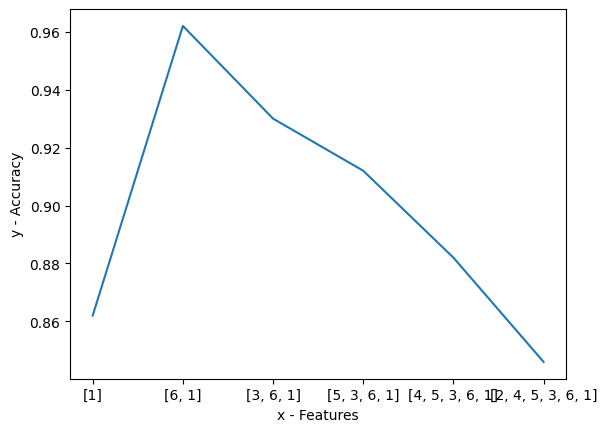

In [24]:
start = time.time()
final_features = []
best = 0.0
visited = []
graph_x = []
graph_y = []
allfeatures = range(1, len(X[0]) + 1)
best_feature = []
alltimebest = []
df = X #np.array(df)
if algo == 1: # forward selection
    for i in range(1, len(X[0]) + 2): # iterating over all the features
#         features = [i]
        level = []
        level_best = 0
        level_features = []
        # Taking common elements from both lists
        intersect = list(set(allfeatures) & set(best_feature))
        for subset in allfeatures:
            if subset in  intersect:
                continue
            features = [subset] + best_feature
            edf = extract_features(features, df) # extracting only features that are in features list
            predictions = knn(edf, y) # initializing the KNN model
            score = accuracy_score(y, predictions)
            print("Features: ", features, "Accuracy: ", round(score*100,2))
            if score > level_best: # if the evaluated score 
                level_best = score # update best score 
                level_features = features
        if len(level_features) != 0:
            best_feature = level_features
            alltimebest.append((level_best, level_features))
            print("Best Feature is: ", level_features, "with accuracy:", round(level_best*100,2), "\n")
            graph_x.append(level_features)
            graph_y.append(level_best)
else:
    eliminated = []
    edf = extract_features(allfeatures, df) # extracting only features that are in features list
    predictions = knn(edf, y) # initializing the KNN model
    best = accuracy_score(y, predictions)
    print("Features: ", list(allfeatures), "Accuracy: ",round(best*100,2))
    Remainingfeatures = list(set(allfeatures).difference(eliminated))

    for i in range(1, len(X[0]) + 2): # iterating over all the features

        level_best = 0
        level_features = []
        
        for subset in Remainingfeatures:
            features = list(set(Remainingfeatures).difference([subset]))
            if len(features) == 0:
                break
            edf = extract_features(features, df) # extracting only features that are in features list
            predictions = knn(edf, y) # initializing the KNN model
            score = accuracy_score(y, predictions)
            print("Features: ", features, "Accuracy: ", round(score*100,2))
            if score > best: # if the evaluated score is greater than previous best score
                best = score # update best score 
                final_features = features
            if score > level_best:
                level_best = score
                level_features = features
        if len(level_features) != 0:
            best_feature = level_features
            alltimebest.append((level_best, level_features))
            print("Best Feature is: ", level_features, "with accuracy:", round(level_best*100,2), "\n")
            Remainingfeatures = level_features
            graph_x.append(level_features)
            graph_y.append(level_best) 
    

# CS170_Small_Data__96.txt
# CS170_Large_Data__21.txt
# CS170_Large_Data__1.txt
# final_features
end = time.time()
graph_x = [str(x) for x in graph_x]
timetaken = str((end - start))[0:5]
print("Final Features: ", max(alltimebest)[1],"Accuracy is" , round(max(alltimebest)[0]*100,2))
print("Algorithm took: ", timetaken, "seconds")

print("\n\n")

import matplotlib.pyplot as plt

plt.plot(graph_x, graph_y)
plt.xlabel('x - Features')
plt.ylabel('y - Accuracy')
plt.show()